<a href="https://colab.research.google.com/github/hongqin/quantum_sandbox/blob/main/202403_LiangCPSC3999_Ex04_3QubitGHZ_NoisySimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 04: Show the 3-qubit GHZ state on ideal and noisy aer Simulator

https://qiskit.github.io/qiskit-aer/tutorials/2_device_noise_simulation.html

## PART 1: Import the library

In [ ]:
!pip install qiskit ipywidgets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.6 MB/s eta 0:00:00


In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_state_city
# from matplotlib import style
%matplotlib inline
import qiskit.quantum_info as qi

## Part 2: Define the Quantum Circuit

### 2.1: Create the circuit

In [ ]:
# Create circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)

### 2.2: Measure and show the circuit

In [ ]:
circ.measure([0,1,2],[0,1,2])
circ.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

## Part 3: Transpile and run on aer simulator

### 3.1: Setup the Ideal aer simulator

In [ ]:
!pip install qiskit-aer --quiet
from qiskit_aer import Aer

Aer.backends()

simulator = Aer.get_backend('aer_simulator')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.5 MB/s eta 0:00:00


### 3.2: Transpile and run the circuit on aer simulator

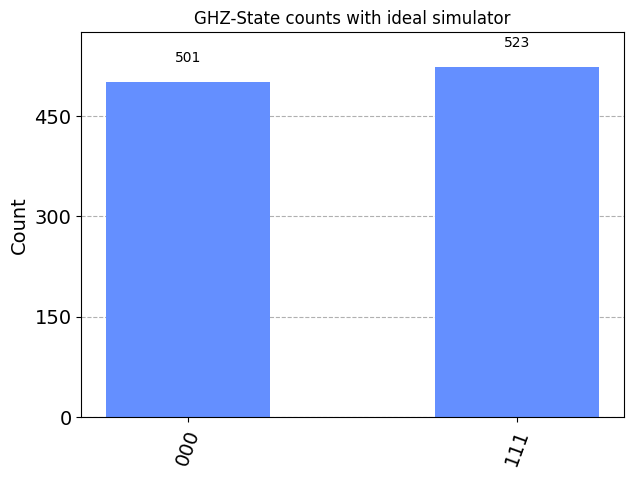

In [ ]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='GHZ-State counts with ideal simulator')

## PART 4: Transpile and run on an noisy simulator

### 4.1: Set up the aer noisy simulator

In [ ]:
# !pip install qiskit-ibmq-provider

In [ ]:
from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()

ImportError: cannot import name 'FakeVigo' from 'qiskit.providers.fake_provider' (/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/__init__.py)

In [ ]:
sim_vigo = AerSimulator.from_backend(device_backend)

### 4.2: transpile and run on the noisy simulator

In [ ]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")